# 01 IMDB Data Preprocessing for GloVe Embeddings

## Preparation

### Setting the seeds for deterministic results


In [2]:
from utils.seed_setter import set_seed
set_seed()

## GloVe Pre-Trained Word Vectors

### Downloading the GloVe Pre-Trained Word Vectors
The next step is to preprocess the reviews in order for them to be suitable to train a model that uses GloVe pre-trained embedding vectors. 

The preprocessing method will not be available for the attacker and will be just used by the black-box algorithm to predict the sentiment of a review.

The GloVe vectors are downloadable from: https://nlp.stanford.edu/projects/glove/

The specific vector that is used in this experiment is the **Common Crawl (840B tokens, 2.2M vocab, cased, 300d vectors, 2.03 GB)**<br>
Direct link: http://nlp.stanford.edu/data/glove.840B.300d.zip

```
@inproceedings{pennington2014glove,
  author = {Jeffrey Pennington and Richard Socher and Christopher D. Manning},
  booktitle = {Empirical Methods in Natural Language Processing (EMNLP)},
  title = {GloVe: Global Vectors for Word Representation},
  year = {2014},
  pages = {1532--1543},
  url = {http://www.aclweb.org/anthology/D14-1162},
}
```

The preprocessing that is done in this experiment follows the steps of this Kaggle entry: https://www.kaggle.com/christofhenkel/how-to-preprocessing-for-glove-part1-eda

### Embeddings Dictionary Creation
After the embedding vectors file has been downloaded we need to create an embedding dictionary

In [3]:
import os
import numpy as np

embeddings_dict = {}

with open(os.path.join('./glove/glove.42B.300d.txt'), "r",errors ='ignore', encoding="utf8") as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype="float32")
        embeddings_dict[word] = coefs
f.close()

In [4]:
print('Words in the Embeddings Dictionary:')
print(len(embeddings_dict))

Words in the Embeddings Dictionary:
1917494


In [6]:
import os
import pickle

os.makedirs(os.path.join('./pickle_data/glove_utils'), exist_ok=True)

with open(os.path.join('./pickle_data/glove_utils/embeddings_dictionary.pickle'), 'wb') as f:
    pickle.dump(embeddings_dict, f)
f.close()

## Data Pre-Processing

### Importing the Train Data

In [7]:
import pickle

with open(os.path.join('./pickle_data/train_test_data/train_data.pickle'), 'rb') as f:
    x_train, y_train = pickle.load(f)
f.close()

x_train_preprocessed = x_train

### Showing the Train Data Words Coverage  by the GloVe Embeddings

In [8]:
import matplotlib.pyplot as plt

def check_coverage(x_train, embeddings_dictionary):
    train_words_list = list(w for sentence in x_train for w in sentence.split())
    found_words_dictionary = {}
    k = 0
    i = 0
    for word in train_words_list:
        try:
            found_words_dictionary[word] = embeddings_dictionary[word]
            k += 1
        except:
            i += 1

    embds_in_vocabulary = len(found_words_dictionary)*100 / len(set(train_words_list))
    embds_in_texts = k*100 / (k + i)
    
    labels = ['Present', 'Non Present']
    explode = (0, 0.1)
    
    fig = plt.figure(figsize=(15,10))
    fig.suptitle('Embeddings coverage in the Train Data', fontsize = 16)
    ax1 = fig.add_subplot(221)
    ax2 = fig.add_subplot(222)
    ax1.title.set_text('Coverage in the Train Data Vocabulary')
    ax2.title.set_text('Coverage in the whole Train Data Texts')
    #fig, (ax1, ax2) = plt.subplots(1,2)
    ax1.pie([embds_in_vocabulary, 100 - embds_in_vocabulary], labels = labels, explode = explode, autopct = '%1.2f%%')
    ax2.pie([embds_in_texts, 100 - embds_in_texts], labels = labels, explode = explode, autopct = '%1.2f%%')
    ax1.axis('equal')
    ax2.axis('equal')
    plt.show()
            
    #print('Found embeddings for {:.2%} of the train data vocabulary'.format(len(found_words_dictionary) / len(set(train_words_list))))
    #print('Found embeddings for  {:.2%} of all the words in the texts'.format(k / (k + i)))

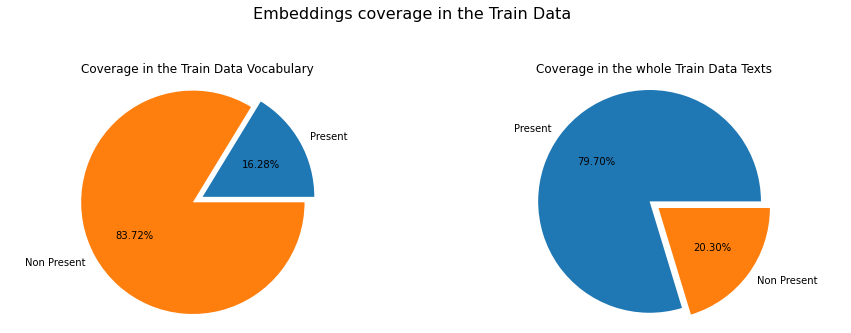

In [9]:
check_coverage(x_train_preprocessed, embeddings_dict)

### Lowercase Preprocessing

In [10]:
print(
    'Number of words in the embeddings starting with a capital letter: {}\n\n'.format(
        len([w for w in embeddings_dict.keys() if w[0].isupper()])
    ) + 
    'Number of unique words in the train data starting with a capital letter: {}\n\n'.format(
        len(set(w for sentence in x_train_preprocessed for w in sentence.split() if w[0].isupper()))
    ) +
    'Number of words in the embeddings containing a capital letter: {}\n\n'.format(
        len([w for w in embeddings_dict.keys() if any(x.isupper() for x in w)])
    ) + 
    'Number of unique words in the train data containing a capital letter: {}\n\n'.format(
        len(set(w for sentence in x_train_preprocessed for w in sentence.split() if any(x.isupper() for x in w)))
    )
)

Number of words in the embeddings starting with a capital letter: 0

Number of unique words in the train data starting with a capital letter: 115983

Number of words in the embeddings containing a capital letter: 0

Number of unique words in the train data containing a capital letter: 179558




In [11]:
x_train_preprocessed = [sentence.lower() for sentence in x_train_preprocessed]

In [12]:
print(
    'Number of words in the embeddings starting with a capital letter: {}\n\n'.format(
        len([w for w in embeddings_dict.keys() if w[0].isupper()])
    ) + 
    'Number of unique words in the train data starting with a capital letter: {}\n\n'.format(
        len(set(w for sentence in x_train_preprocessed for w in sentence.split() if w[0].isupper()))
    ) +
    'Number of words in the embeddings containing a capital letter: {}\n\n'.format(
        len([w for w in embeddings_dict.keys() if any(x.isupper() for x in w)])
    ) + 
    'Number of unique words in the train data containing a capital letter: {}\n\n'.format(
        len(set(w for sentence in x_train_preprocessed for w in sentence.split() if any(x.isupper() for x in w)))
    )
)

Number of words in the embeddings starting with a capital letter: 0

Number of unique words in the train data starting with a capital letter: 0

Number of words in the embeddings containing a capital letter: 0

Number of unique words in the train data containing a capital letter: 0




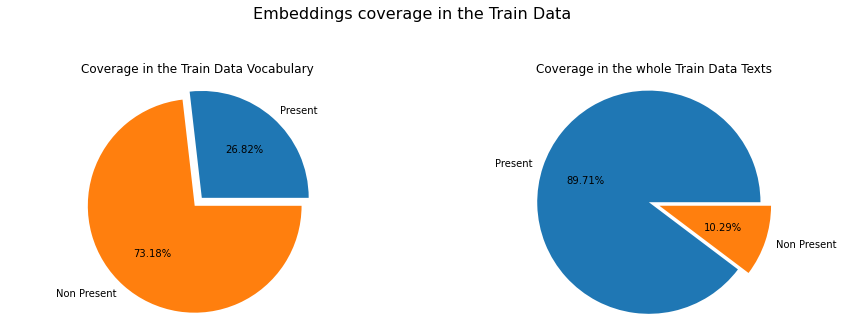

In [13]:
check_coverage(x_train_preprocessed, embeddings_dict)

### Checking non-latin symbols in the embeddings

In [14]:
import string
latin_similar = "’'‘ÆÐƎƏƐƔĲŊŒẞÞǷȜæðǝəɛɣĳŋœĸſßþƿȝĄƁÇĐƊĘĦĮƘŁØƠŞȘŢȚŦŲƯY̨Ƴąɓçđɗęħįƙłøơşșţțŧųưy̨ƴÁÀÂÄǍĂĀÃÅǺĄÆǼǢƁĆĊĈČÇĎḌĐƊÐÉÈĖÊËĚĔĒĘẸƎƏƐĠĜǦĞĢƔáàâäǎăāãåǻąæǽǣɓćċĉčçďḍđɗðéèėêëěĕēęẹǝəɛġĝǧğģɣĤḤĦIÍÌİÎÏǏĬĪĨĮỊĲĴĶƘĹĻŁĽĿʼNŃN̈ŇÑŅŊÓÒÔÖǑŎŌÕŐỌØǾƠŒĥḥħıíìiîïǐĭīĩįịĳĵķƙĸĺļłľŀŉńn̈ňñņŋóòôöǒŏōõőọøǿơœŔŘŖŚŜŠŞȘṢẞŤŢṬŦÞÚÙÛÜǓŬŪŨŰŮŲỤƯẂẀŴẄǷÝỲŶŸȲỸƳŹŻŽẒŕřŗſśŝšşșṣßťţṭŧþúùûüǔŭūũűůųụưẃẁŵẅƿýỳŷÿȳỹƴźżžẓ"
safe_characters = string.ascii_letters + string.digits + latin_similar + ' '
safe_characters += "'"

In [15]:
glove_chars = [c for c in list(embeddings_dict.keys()) if len(c) == 1]
glove_symbols = [c for c in glove_chars if not c in safe_characters]
print('Non latin symbols in the GloVe Embeddings:')
print(glove_symbols)

Non latin symbols in the GloVe Embeddings:
[',', '.', '"', ':', ')', '(', '-', '!', '?', '|', ';', '$', '&', '/', '[', ']', '>', '%', '=', '#', '+', '@', '~', '£', '\\', '_', '{', '}', '^', '`', '<', '€', '›', '½', '…', '“', '”', '–', '¢', '¡', '¿', '―', '¥', '—', '‹', '¼', '¤', '¾', '、', '»', '。', '‟', '￥', '«', '฿', 'ª', '˚', 'ƒ', 'ˈ', 'ˑ', '⅓', '˜', '₤', 'ˆ', '￡', '₂', '˙', '؟', '˝', '⅛', '„', 'ɡ', '۞', '๑', '⅔', 'ˌ', 'ﾟ', '⅜', '‛', '܂', '⁰', 'ở', '⅝', 'ﬁ', '͡', '̅', '۩', 'α', 'ʈ', '⅞', 'ɪ', '￦', ';', '̣', '˛', '٠', '₃', 'ȃ', '‚', 'ν', '۶', 'ǡ', 'ʿ', 'ʃ', '₁', 'β', 'ʤ', '˘', '٩', '̵', '￠', 'в', '̶', 'ǥ', 'λ', '２', 'δ', '٤', '۵', 'ˇ', '۲', '́', '１', 'ー', '۰', 'ƃ', 'ɔ', 'ɑ', '̂', 'ǀ', 'ω', '۱', 'ʡ', 'ʊ', '̃', '日', '⁴', 'ʒ', '̳', '３', '։', 'μ', 'ɂ', '₄', 'θ', 'ɨ', 'ｏ', 'ͧ', '年', 'ǰ', 'φ', 'ȥ', '７', 'ɿ', 'ـ', 'γ', 'ʌ', 'ǂ', 'ʻ', 'ɐ', 'ﬂ', 'ǹ', '̿', '̊', 'ƥ', 'ɒ', 'и', 'π', '４', 'ɹ', 'а', 'ｓ', '̏', 'ʔ', 'σ', 'ａ', 'ｉ', 'ȡ', 'ǵ', 'は', 'ǩ', '⁵', '̀', 'ʹ', '５', 'ᴥ', '߂', '˃', '˹', 'ȣ', '͂', 

In [16]:
train_chars = set(w for sentence in x_train_preprocessed for w in sentence)
train_symbols = [c for c in train_chars if not c in safe_characters]
print('Non latin symbols in the Train Data:')
print(train_symbols)

Non latin symbols in the Train Data:
['\x9e', '@', '"', ':', '|', '¡', '-', '“', '%', '、', ']', 'º', '\x91', '\x8d', '\xa0', '<', '\x85', '”', '^', '\uf04a', '\x84', '«', '\x95', '，', '·', '\t', '★', '–', ',', '\x97', '…', '₤', '?', '>', '=', ';', '½', '*', '¿', '~', '/', '\x9a', '¨', '{', '£', '¦', '¾', '`', '#', '\x80', '[', '}', '¤', '!', '&', '_', '´', '»', '\uf0b7', '®', '\x8e', '°', ')', '″', '.', '+', '\\', '$', '©', '(', '\x96', 'ª']


In [17]:
symbols_to_delete = [c for c in train_symbols if not c in glove_symbols]
print('Symbols to delete in the Train Data:')
print(symbols_to_delete)

Symbols to delete in the Train Data:
['\x9e', 'º', '\x91', '\x8d', '\xa0', '\x85', '\uf04a', '\x84', '\x95', '，', '·', '\t', '★', '\x97', '*', '\x9a', '¨', '¦', '\x80', '´', '\uf0b7', '®', '\x8e', '°', '″', '©', '\x96']


In [18]:
symbols_to_isolate = [c for c in train_symbols if c in glove_symbols]
print('Symbols to delete in the Train Data:')
print(symbols_to_isolate)

Symbols to delete in the Train Data:
['@', '"', ':', '|', '¡', '-', '“', '%', '、', ']', '<', '”', '^', '«', '–', ',', '…', '₤', '?', '>', '=', ';', '½', '¿', '~', '/', '{', '£', '¾', '`', '#', '[', '}', '¤', '!', '&', '_', '»', ')', '.', '+', '\\', '$', '(', 'ª']


In [19]:
def handle_symbols(text):
    for symbol in symbols_to_delete:
        text = text.replace(symbol, ' ')
    for symbol in symbols_to_isolate:
        text = text.replace(symbol, ' ' + symbol + ' ')
    return text

In [20]:
x_train_preprocessed = [handle_symbols(sentence) for sentence in x_train_preprocessed]

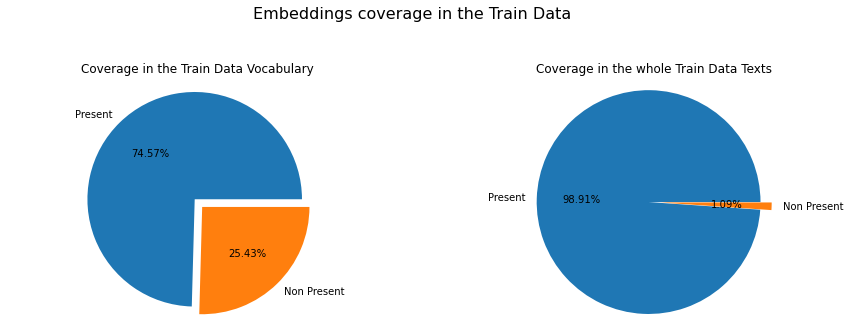

In [21]:
check_coverage(x_train_preprocessed, embeddings_dict)

### Handling word contractions

In [22]:
from nltk.tokenize.treebank import TreebankWordTokenizer
tokenizer = TreebankWordTokenizer()

In [23]:
def handle_contractions(text):
    text = tokenizer.tokenize(text)
    text = ' '.join(text)
    return text

In [24]:
x_train_preprocessed = [handle_contractions(sentence) for sentence in x_train_preprocessed]

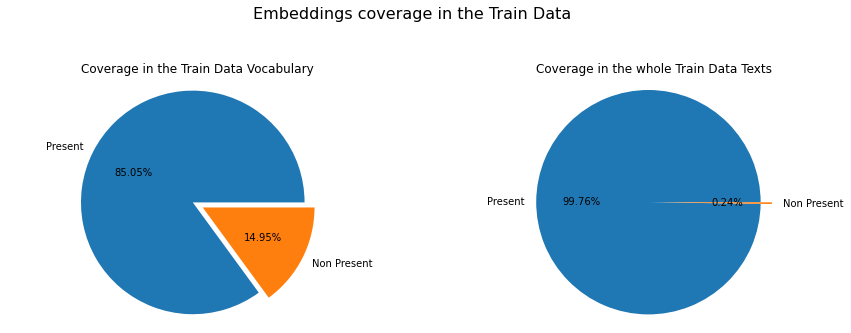

In [25]:
check_coverage(x_train_preprocessed, embeddings_dict)

### Handling words starting with '

In [26]:
print(set(w for sentence in x_train_preprocessed for w in sentence.split() if w not in embeddings_dict.keys()))

{"'days", 'showeman', 'gratitous', 'knifee', 'perfectand', 'gaillardian', "'futurise", 'residenthazard', 'mourikis', 'schfrin', 'wamb', 'streeb', "'baroque", 'andrejew', 'alexanderphile', 'mäx', 'cringeable', 'kinghtly', "'horny", 'malansky', 'etherizes', "'fargo", "diner'who", "'is", 'cornily', "4'11", 'epätoivoista', "'modelos", 'avjo', "'namasteay", 'ayacoatl', 'julinana', 'hrolfgar', 'amrapurkar', "'witch", 'mauvis', "'las", "'melissa", 'songcinematography', 'overdramaticizing', "'umi", 'msamati', 'fictionalizers', 'captionings', 'higuchinsky', "'vaguely", 'pataker', 'takuand', "'carry", 'sangie', "'tower", 'ollllld', "'teen", "'june", 'hoojah', 'tcampo23', "'immortalised", 'yuunagi', 'ctomvelu', 'patagonious', 'offensivelyhypocritical', "'therapy", 'frankencreatures', 'uncronological', "'niagara", "'thing", 'slight1y', 'colmyster', 'masauki', 'corcorin', '4roving', 'scenesdirection', 'alfrie', 'maojlovic', 'rabified', 'giantsthis', 'seinfeldish', 'completeist', "it'a", 'furtermore

In [27]:
def fix_quote(text):
    return ' '.join(w[1:] if w.startswith("'") and len(w) > 1 else w for w in text.split())

In [28]:
x_train_preprocessed = [fix_quote(sentence) for sentence in x_train_preprocessed]

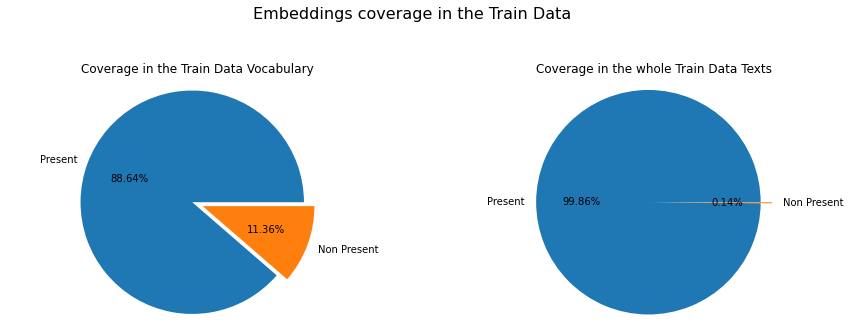

In [29]:
check_coverage(x_train_preprocessed, embeddings_dict)

## Creating a Preprocesser Class for the Black Box Algorithm

### Saving variables to use for the Preprocesser

In [30]:
import os
import pickle

os.makedirs(os.path.join('./pickle_data/preprocesser_utils'), exist_ok=True)

with open(os.path.join('./pickle_data/preprocesser_utils/utils.pickle'), 'wb') as f:
    pickle.dump([symbols_to_delete, symbols_to_isolate], f)
f.close()

In [31]:
os.makedirs(os.path.join('./utils'), exist_ok=True)

### Creating the BlackBoxPreprocesser class

In [32]:
%%writefile ./utils/black_box_preprocessing.py

import pickle
from nltk.tokenize.treebank import TreebankWordTokenizer

class BlackBoxPreprocesser(object):
    
    def __init__(self):
        with open('./pickle_data/preprocesser_utils/utils.pickle', 'rb') as f:
            symbols_to_delete, symbols_to_isolate = pickle.load(f)
            self.__symbols_to_delete = symbols_to_delete
            self.__symbols_to_isolate = symbols_to_isolate
        f.close()
        self.__tree_bank_word_tokenizer = TreebankWordTokenizer()
    
    def __handle_symbols(self, text):
        for symbol in self.__symbols_to_delete:
            text = text.replace(symbol, ' ')
        for symbol in self.__symbols_to_isolate:
            text = text.replace(symbol, ' ' + symbol + ' ')
        return text
    
    def __handle_contractions(self, text):
        text = self.__tree_bank_word_tokenizer.tokenize(text)
        return ' '.join(text)
    
    def __fix_quotes(self, text):
        return ' '.join(w[1:] if w.startswith("'") and len(w) > 1 else w for w in text.split())
        
    def preprocess_text(self, text):
        text = text.lower()
        text = self.__handle_symbols(text)
        text = self.__handle_contractions(text)
        text = self.__fix_quotes(text)
        return text


Overwriting ./utils/black_box_preprocessing.py


### Testing the BlackBoxPreprocesser Class

In [33]:
from utils.black_box_preprocessing import BlackBoxPreprocesser

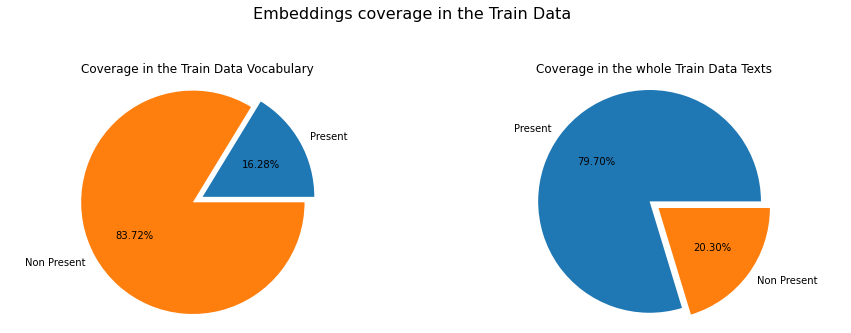

In [34]:
check_coverage(x_train, embeddings_dict)

In [35]:
black_box_preprocesser = BlackBoxPreprocesser()

In [36]:
x_train = [black_box_preprocesser.preprocess_text(text) for text in x_train]

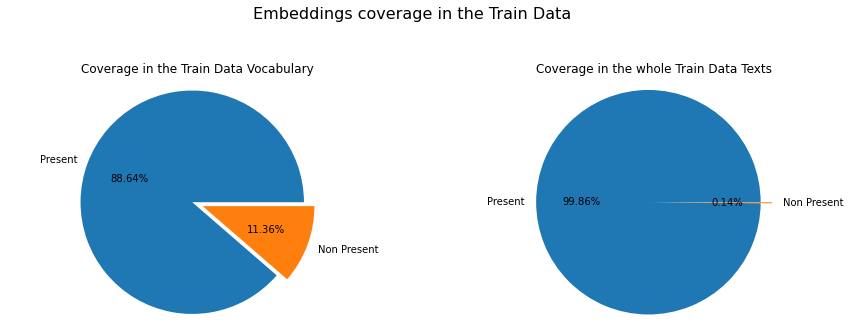

In [37]:
check_coverage(x_train, embeddings_dict)